# FakeNewsDetection

In this notebook, we will be solving a use case of 'Fake News Detection' - Predict if a news published in an article is 'True' or 'Fake' for a sample data using ML Algorithms!

**Note**: Update variables under **Variables** section if required before running the notebook. To run notebook cell by cell, click on a cell and click **Run** button below the Menu bar. Or to run all cells, select **Cell --> Run** All from Menu bar.

### Variables

In [1]:
#Specify the input filename
INPUTFILE=r"fakenews.csv"
#Specify the ratio of the data to subset for prediction
test_data_ratio = 0.2

### Import libraries to detect fake news

In [2]:
from detect import FakeNewsDetection

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LakshmipathyGanesh\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LakshmipathyGanesh\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


### Training & Prediction

In [3]:
fakenews = FakeNewsDetection(INPUTFILE, test_data_ratio)

                                                text  label
0  Get the latest from TODAY Sign up for our news...      1
1  2d  Conan On The Funeral Trump Will Be Invited...      1
2  It’s safe to say that Instagram Stories has fa...      0
3  Much like a certain Amazon goddess with a lass...      0
4  At a time when the perfect outfit is just one ...      0
0.2


---Preprocessing data---
Splitting data into train and test set
---Training the model on train set---
Logistic regression model trained successfully!
Classification Metrics for the train set is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2391
           1       1.00      1.00      1.00      1597

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988



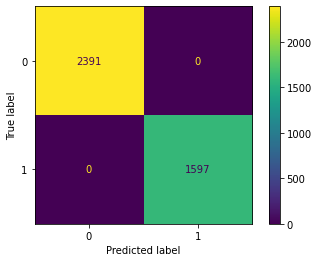

--- Testing the model on the test set---
Classification Metrics for the test set is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       417

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



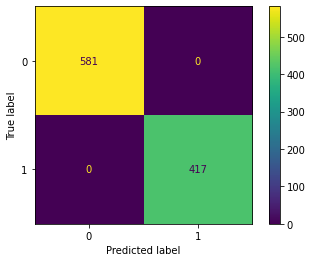

In [4]:
fakenews.detect()

This is a starter notebook for FakeNewsDetection using 'Logistic Regression' model. More detailed analysis can be found in the **'FakeNewsDetection-analysis.ipynb'** notebook in the current directory.